# CartPole Q-learning

In [26]:
import gymnasium as gym
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Set up environment

In [27]:
env = gym.make("CartPole-v1")
state, _ = env.reset(seed=74)

### Hyperparameters

In [28]:
LEARNING_RATE = 0.2
GAMMA = 1
EPSILON = 0.2
EPSILON_DECAY = 0.670
EPISODES = 2000
MAX_STEPS = 1000
BINS = (38, 38, 38, 38)
SEED = 1

N_ACTIONS = env.action_space.n
np.random.seed(seed=SEED)
TRAINING_ERROR = []

### Initialize Q-Table

In [30]:
QTABLE = np.random.uniform(low=0, high=1, size=(*BINS, N_ACTIONS))

### State Discretization

In [31]:
low = [-4.8, -3, env.observation_space.low[2], -10]
high = [4.8, 3, env.observation_space.high[2], 10]

state_bins = [
    np.linspace(low[0], high[0], BINS[0]),
    np.linspace(low[1], high[1], BINS[1]),
    np.linspace(low[2], high[2], BINS[2]),
    np.linspace(low[3], high[3], BINS[3])
]

def discretize_state(state):
    global state_bins
    state_index = []
    for i in range(len(state)):
        index = np.maximum(np.digitize(state[i], state_bins[i]) - 1, 0)
        state_index.append(index)
    return tuple(state_index)

### Decay Epsilon

In [32]:
def decay_epsilon():
    global EPSILON, EPSILON_DECAY
    EPSILON *= EPSILON_DECAY

### Action Selection

In [33]:
def select_action(state, index):
    global N_ACTIONS, EPSILON, EPSILON_DECAY, QTABLE
    if index < 100:
        return np.random.choice(N_ACTIONS)

    if np.random.random() < EPSILON:
        return np.random.choice(N_ACTIONS)
    else:
        return np.argmax(QTABLE[state])

### Update Q-Table

In [34]:
def update_q_table(state, action, reward, next_state, terminated):
    global GAMMA, LEARNING_RATE, QTABLE, TRAINING_ERROR
    q_max_next = np.max(QTABLE[next_state])
    state_action = state + (action,)

    if not terminated:
        td_error = reward + GAMMA * q_max_next - QTABLE[state_action]
        QTABLE[state_action] += LEARNING_RATE * td_error
        TRAINING_ERROR.append(td_error)
    else:
        td_error = reward - QTABLE[state_action]
        QTABLE[state_action] += LEARNING_RATE * td_error
        TRAINING_ERROR.append(td_error)

### Train Q-Learning agent

In [35]:
episode_rewards = np.zeros(EPISODES)
average_reward = []
solved_episode = None

start = time.time()
for episode in range(EPISODES):    
    state, _ = env.reset()
    cumulative_reward = 0.0
    for _ in range(MAX_STEPS):
        discretized_state = discretize_state(state)
        action = select_action(discretized_state, episode)
        next_state, reward, terminated, _, _ = env.step(action)
        discretized_next_state = discretize_state(next_state)
        update_q_table(discretized_state, action, reward, discretized_next_state, terminated)
        cumulative_reward += reward
        state = next_state
        if terminated:
            break
    
    episode_rewards[episode] = cumulative_reward
    print(f"Episode: {episode}, Rewards: {cumulative_reward}")

    if episode > 700:
        decay_epsilon()
    
    if episode >= 100:
        avg_reward = sum(episode_rewards[episode-100:episode]) / 100
        average_reward.append(avg_reward)
        if avg_reward >= 475 and solved_episode is None:
            solved_episode = episode
    else:
        average_reward.append(sum(episode_rewards[:episode]) / 100)

end = time.time()
training_time = end - start

Episode: 0, Rewards: 37.0
Episode: 1, Rewards: 12.0
Episode: 2, Rewards: 14.0
Episode: 3, Rewards: 27.0
Episode: 4, Rewards: 14.0
Episode: 5, Rewards: 16.0
Episode: 6, Rewards: 25.0
Episode: 7, Rewards: 18.0
Episode: 8, Rewards: 30.0
Episode: 9, Rewards: 15.0
Episode: 10, Rewards: 30.0
Episode: 11, Rewards: 42.0
Episode: 12, Rewards: 18.0
Episode: 13, Rewards: 63.0
Episode: 14, Rewards: 39.0
Episode: 15, Rewards: 36.0
Episode: 16, Rewards: 13.0
Episode: 17, Rewards: 16.0
Episode: 18, Rewards: 27.0
Episode: 19, Rewards: 15.0
Episode: 20, Rewards: 16.0
Episode: 21, Rewards: 37.0
Episode: 22, Rewards: 18.0
Episode: 23, Rewards: 17.0
Episode: 24, Rewards: 13.0
Episode: 25, Rewards: 22.0
Episode: 26, Rewards: 14.0
Episode: 27, Rewards: 21.0
Episode: 28, Rewards: 35.0
Episode: 29, Rewards: 15.0
Episode: 30, Rewards: 24.0
Episode: 31, Rewards: 16.0
Episode: 32, Rewards: 28.0
Episode: 33, Rewards: 22.0
Episode: 34, Rewards: 18.0
Episode: 35, Rewards: 27.0
Episode: 36, Rewards: 11.0
Episode: 37

### Print Metrics

In [36]:
print(f"Average Reward: {np.mean(episode_rewards)}")
print(f"Average Reward (last 100): {np.mean(episode_rewards[-100:])}")
print(f"Solved at episode: {solved_episode}")
print(f"Training Time (seconds): {training_time}")

Average Reward: 398.0845
Average Reward (last 100): 502.43
Solved at episode: 806
Training Time (seconds): 54.550416469573975


### Plot Results

/home/noname/anaconda3/envs/cartpole/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/noname/anaconda3/envs/cartpole/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/noname/anaconda3/envs/cartpole/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/noname/anaconda3/envs/cartpole/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

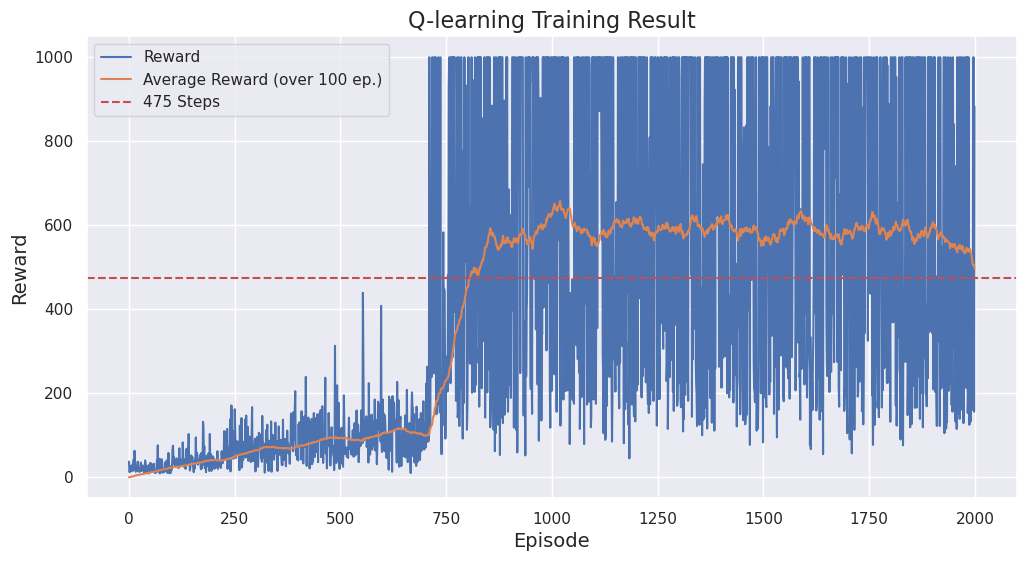

In [37]:
data = {
    'Episode': range(EPISODES),
    'Reward': episode_rewards,
    'Average Reward': average_reward
}

df = pd.DataFrame(data)

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Episode', y='Reward', label='Reward')
sns.lineplot(data=df, x='Episode', y='Average Reward', label='Average Reward (over 100 ep.)')
plt.axhline(y=475, color='r', linestyle='--', label='475 Steps')

plt.title('Q-learning Training Result', fontsize=16)
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Reward', fontsize=14)
plt.legend(loc='upper left')
plt.show()

/home/noname/anaconda3/envs/cartpole/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/noname/anaconda3/envs/cartpole/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


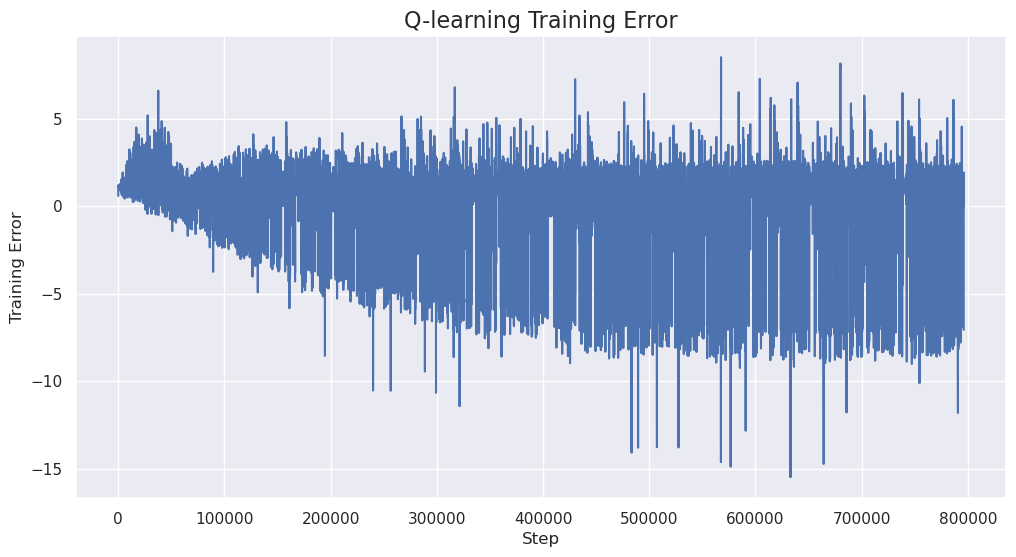

In [38]:
rolling_length = 100
training_error_moving_average = (
    np.convolve(np.array(TRAINING_ERROR), np.ones(rolling_length), mode="same")
    / rolling_length
)

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(training_error_moving_average)), y=training_error_moving_average)
plt.title("Q-learning Training Error", fontsize=16)
plt.xlabel("Step")
plt.ylabel("Training Error")
plt.show()